# Bob constructions B.V. : het woningen voor starters project

![Bob construction B.V.](https://upload.wikimedia.org/wikipedia/en/c/c5/Bob_the_builder.jpg)

Namens Bob construction B.V. hierbij de analyse voor mogelijk woningbouw in Nederland voor starterwoningen. Dit document bevat het advies opdeelt in twee delen. Advies deel 1 bestaat uit het advies waar het beste een woonwijk gebouwd kan worden binnen Nederland. Advies deel 2 geeft een inschatting van de potentiele winst op basis van het beschikbare budget en daarnaast zal de vraag beantwoord worden hoe Bob construction B.V. binnen het gestelde budget een maximaal aantal starters zo snel mogelijk aan een nieuw huis kan helpen. Om dit advies te kunnen geven is er analyse gemaakt op basis van 2 bij geleverde datasets met verschillende informatie over wijken, buurten en gemeente in Nederland. Daarnaast zijn er nog 3 andere datasets gebruikt voor informatie omtrent groen voorziening, inkomen, en visualisaties. 

Uit de data is voortgekomen dat er onvoldoende data beschikbaar is op wijk en buurt niveau om een goede keuze te maken welke buurt of wijk het beste gekozen kan worden om te kunnen bouwen. Op basis van deze ingeving is er besloten om de analyse voort te zetten op gemeentelijk niveau. Op gemeentelijk niveau is op te merken dat hoger inkomens dichterbij facilteiten zoals artsen, scholen, supermarkten wonen. Daarnaast is opgevallen dat veel bouwoppervlakte niet in de buurt ligt van deze faciliteiten, maar dichter in de buurt van groen. Op basis van deze interpretaties en optimalisatie wordt het volgende geadviseert aan Bob Construction B.V:

- Vanwege een tekort aan data op wijk en buurt niveau, moet de bouw analyse van woningen op gemeentelijk niveau plaats vinden. 
- Er is een negatieve correlatie tussen de afstand van artsen, scholen, kinderdagverblijven en supermarkt vs groenvoorzieningen, wat betekent dat Bob Construction B.V. wellicht een afweging moeten maken tussen bouwen voor facilteiten of groenvoorzieningen
- Op basis van hoeveelheid bouwgrond oppervlakte, kortste afstand naar faciliteiten, en afstand naar groenvoorzieningen zijn gemeentes Apeldoorn, Borger-Doorn, Ede, Westerveld en Zeewolde
- Op basis van winst optimalisatie kan er het beste 69 woningen gebouwd worden Apeldoorn met een potentiële winst van 71155,- per woning. Dit is op basis van een hypotheek van twee starters die gemiddeld verdienen binnen deze gemeente met 0 (studie) schuld. 
- Op basis van winst optimalisatie kan er het beste 69 woningen gebouwd worden Borger-Odoorn met een potentiële winst van 17711,-. Dit is op basis van een hypotheek van twee starters die gemiddeld verdienen binnen deze gemeente met 20.000 (studie) schuld.
- In beide gemeentes kunnen 138 starters geholpen worden aan het woningen

Het document bestaat uit totaal 7 hoofdstukken, waarin hoofdstuk 1 en 2 vier datasets worden voorbereid voor gebruik, om vervolgens samengevoegd te worden op gemeente niveau. In hoofdstuk 3, 4 en 5 wordt vervolgens deze data geanalyseerd en de gemeentes gekozen (advies deel 1). In laatste twee hoofdstukken worden de hoeveelheid woningen en winst geoptimaliseert.     


## 1. Data voorbereiding
Voordat er een analyse gemaakt kan worden moet de data geimporteert, gevalideert en verbonden worden. Vanwege dat de data uit verschillende bronnen komt is het raadzaam om als eerste stap de data te bekijken. Om dit te kunnen doen worden de volgende python packages geimporteert.   

In [1]:
import geopandas as gpd
import numpy as np
import pandas as pd

Vervolgens kunnen we data inladen. 

In [2]:
df_data_1 = pd.read_csv('data/data_1.csv')
df_data_2 = pd.read_csv('data/data_2.csv')
df_data_3 = pd.read_excel('data/groen_nederland_dataset.xlsx')
df_data_4 = pd.read_excel('data/gemiddeld_inkomen_nederlandse_gemeentes.xlsx')

Aller eerst is het nu belangrijk om te kijken wat voor data we hebben. Hiervoor gebruiken we `.info()` method om zo inzicht te krijgen in onze dataframes. 

In [3]:
df_data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16667 entries, 0 to 16666
Data columns (total 41 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Unnamed: 0.1                     16667 non-null  int64  
 1   Unnamed: 0                       16667 non-null  int64  
 2   ID                               16667 non-null  int64  
 3   WijkenEnBuurten                  16667 non-null  object 
 4   Gemeentenaam_1                   16667 non-null  object 
 5   SoortRegio_2                     16667 non-null  object 
 6   Codering_3                       16667 non-null  object 
 7   AantalInwoners_5                 16667 non-null  int64  
 8   Mannen_6                         16667 non-null  int64  
 9   Vrouwen_7                        16667 non-null  int64  
 10  k_0Tot15Jaar_8                   16667 non-null  int64  
 11  k_15Tot25Jaar_9                  16667 non-null  int64  
 12  k_25Tot45Jaar_10  

In [4]:
df_data_1.head()

,Unnamed: 0.1,Unnamed: 0,ID,WijkenEnBuurten,Gemeentenaam_1,SoortRegio_2,Codering_3,AantalInwoners_5,Mannen_6,Vrouwen_7,...,Hoekwoning_50,TweeOnderEenKapWoning_51,VrijstaandeWoning_52,AfstandTotHuisartsenpraktijk_94,AfstandTotGroteSupermarkt_95,AfstandTotKinderdagverblijf_96,AfstandTotSchool_97,ScholenBinnen3Km_98,TotaleOppervlakte_4,BouwgrondOpp
0,0,0,0,Nederland,Nederland,Land,NL00,17081507,8475102,8606405,...,3100.0,3430.0,4040.0,1.0,0.9,0.8,0.7,11.2,4154302,434426
1,1,1,1,Aa en Hunze,Aa en Hunze,Gemeente,GM1680,25286,12603,12683,...,2640.0,3090.0,3700.0,2.5,2.3,1.1,1.2,1.8,27887,5992
2,2,2,2,Wijk 00 Annen,Aa en Hunze,Wijk,WK168000,3545,1710,1835,...,2860.0,3300.0,3810.0,1.0,0.9,0.5,0.8,2.4,1478,53
3,3,3,3,Annen,Aa en Hunze,Buurt,BU16800000,3395,1635,1760,...,2860.0,3300.0,3720.0,0.9,0.8,0.5,0.7,2.5,252,3
4,4,4,4,Verspreide huizen Annen,Aa en Hunze,Buurt,BU16800009,150,80,75,...,NaN,NaN,4830.0,2.7,2.1,1.7,2.1,1.2,1226,49


Op basis van `.info()` en de eerste vijf rijen is te zien dat het om een grote dataset gaat van ongeveer 16.667 entiteiten met verschillende soorten gegevens over de wijk, buurt, gemeente en zelfs het land. Uit de gegevens kan het volgende worden opgemaakt wat interessant kan zijn voor de analyse:

- De kolom `SoortRegio_2` geeft aan of de rij informatie over een land, gemeente, wijk of buurt bevat.
- De kolom `Gemeentenaam_1` geeft aan bij welke gemeente de rij met informatie hoort.
- De kolommen `AfstandTotHuisarts`, `AfstandTotSupermarkt`, `AfstandTotKinderdagverblijf` en `AfstandTotSchool` geven de afstand tussen faciliteiten aan binnen een gemeente, wijk, buurt of land.
- De kolom `Scholenbinnen3km` geeft de hoeveelheid scholen aan binnen een straal van 3 km.
- De kolom `bouwgrondopp` geeft de bouwgrondoppervlakte weer van een land, gemeente, wijk of buurt.

Naast deze kolommen moeten we ook een kijkje nemen in de datatypes die binnen het dataframe worden gebruikt op basis van `.info()`. Over het algemeen geeft deze dataset een goed overzicht van de faciliteiten en bouwoppervlak voor mogelijke woningen. Dit kunnen we meenemen voor de analyse. Echter, voordat we verdergaan met de analyse, moeten we wel kijken of de data in orde is.

Eerst kijken we voor duplicaten binnen de dataset

In [5]:
len(df_data_1[df_data_1['Codering_3'].duplicated()])

0

Geen duplicaten te vinden, dus nu kunnen we kijken of er null waardes in dataset aanwezig zijn. 

In [6]:
df_data_1.isnull().sum()

Unnamed: 0.1                          0
Unnamed: 0                            0
ID                                    0
WijkenEnBuurten                       0
Gemeentenaam_1                        0
SoortRegio_2                          0
Codering_3                            0
AantalInwoners_5                      0
Mannen_6                              0
Vrouwen_7                             0
k_0Tot15Jaar_8                        0
k_15Tot25Jaar_9                       0
k_25Tot45Jaar_10                      0
k_45Tot65Jaar_11                      0
k_65JaarOfOuder_12                    0
GeboorteTotaal_24                     0
GeboorteRelatief_25                   0
SterfteTotaal_26                      0
SterfteRelatief_27                    0
HuishoudensTotaal_28                  0
Eenpersoonshuishoudens_29             0
HuishoudensZonderKinderen_30          0
HuishoudensMetKinderen_31             0
GemiddeldeHuishoudensgrootte_32     332
Bevolkingsdichtheid_33              628


Door de `isnull().sum()` functies te gebruiken kunnen we null waardes uit het dataframe filteren en deze bij elkaar optellen. Hier zien we dat de enkele kolommen null waardes bevatten en dat is eigenlijk niet handig voor de analyse. Echter moeten we ook kijken of de impact van deze null waardes opwegen tegenover de algemene data die wel klopt. Daarom halen we nu eerst de data op die null waardes bevatten. 

In [7]:
df_data_1[df_data_1.isna().any(axis=1)]

,Unnamed: 0.1,Unnamed: 0,ID,WijkenEnBuurten,Gemeentenaam_1,SoortRegio_2,Codering_3,AantalInwoners_5,Mannen_6,Vrouwen_7,...,Hoekwoning_50,TweeOnderEenKapWoning_51,VrijstaandeWoning_52,AfstandTotHuisartsenpraktijk_94,AfstandTotGroteSupermarkt_95,AfstandTotKinderdagverblijf_96,AfstandTotSchool_97,ScholenBinnen3Km_98,TotaleOppervlakte_4,BouwgrondOpp
4,4,4,4,Verspreide huizen Annen,Aa en Hunze,Buurt,BU16800009,150,80,75,...,NaN,NaN,4830.0,2.7,2.1,1.7,2.1,1.2,1226,49
7,7,7,7,Verspreide huizen Eext,Aa en Hunze,Buurt,BU16800109,175,85,90,...,NaN,NaN,3340.0,3.5,2.6,1.9,2.1,1.3,1618,414
8,8,8,8,Wijk 02 Anloo,Aa en Hunze,Wijk,WK168002,465,235,230,...,NaN,2560.0,3910.0,1.9,2.7,2.2,0.5,2.0,816,278
9,9,9,9,Anloo,Aa en Hunze,Buurt,BU16800200,335,160,175,...,NaN,2600.0,3760.0,1.9,2.7,2.2,0.4,2.0,57,0
10,10,10,10,Verspreide huizen Anloo,Aa en Hunze,Buurt,BU16800209,135,80,55,...,NaN,2280.0,4690.0,1.9,2.8,2.2,0.9,1.9,759,278
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16658,16658,16658,16658,Ittersumerlanden,Zwolle,Buurt,BU01935110,3865,1860,2005,...,2780.0,3410.0,NaN,0.5,0.6,0.4,0.6,11.7,50,0
16660,16660,16660,16660,Geren,Zwolle,Buurt,BU01935130,810,440,370,...,2870.0,NaN,3320.0,0.7,1.3,1.0,0.9,13.4,21,0
16663,16663,16663,16663,Oude Mars,Zwolle,Buurt,BU01935160,90,45,45,...,NaN,NaN,5910.0,1.5,1.6,1.6,1.6,8.9,45,0
16665,16665,16665,16665,Windesheim,Zwolle,Buurt,BU01935200,400,190,205,...,2830.0,3390.0,3750.0,4.8,4.9,0.4,0.4,1.0,53,0


Een eerste snelle analyse laat zien dat 9866 rijen null waardes bevatten. Verder lijkt het erop dat deze rijen voornamelijk bestaan uit Buurten en Wijken, wat logisch zou kunnen zijn aangezien het soms lastig is om precieze gegevens uit deze specifieke categorieen te halen. Om deze observatie na te kijken kunnen we een `value_counts()` op de SoortRegio_2 kolom aanroepen om zo unieke waardes te tellen. 

In [8]:
df_data_1[df_data_1.isna().any(axis=1)]['SoortRegio_2'].value_counts()

SoortRegio_2
Buurt         8863
Wijk          1003
Name: count, dtype: int64

In [9]:
df_data_1['SoortRegio_2'].value_counts()

SoortRegio_2
Buurt         13208
Wijk           3070
Gemeente        388
Land              1
Name: count, dtype: int64

Zoals de verwachting was zien we hier dat de null waardes in `df_data_1` uit rijen van buurten en wijken komen. Dit komt naar verwachting omdat het CBS veel werkt vanuit het Rijk/gemeentelijk niveau en daar hun statetieken op baseren. Daarnaast is het gewoonweg erg lastig om op buurt/wijk niveau data te vergaren. Echter heeft dit wel consequenties voor onze analyze aangezien uit de 13208 buurten totaal 8863 buurten null waardes hebben en van de 3070 wijken totaal 1003 wijken null waardes hebben. Het gevolg hiervan kan zijn dat de analyse wellicht een niveau hoger getrokken moet worden, namelijk op gemeente niveau. Maar meer analyse van de andere datasets is eerst nodig. 

In [10]:
df_data_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 384 entries, 0 to 383
Data columns (total 5 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Unnamed: 0                        384 non-null    int64  
 1   RegioS                            383 non-null    object 
 2   GemiddeldeVerkoopprijs_1          382 non-null    float64
 3   GemiddeldeWOZWaardeVanWoningen_1  382 non-null    float64
 4   GemiddeldeDoorlooptijd_12         365 non-null    float64
dtypes: float64(3), int64(1), object(1)
memory usage: 15.1+ KB


In [11]:
df_data_2

,Unnamed: 0,RegioS,GemiddeldeVerkoopprijs_1,GemiddeldeWOZWaardeVanWoningen_1,GemiddeldeDoorlooptijd_12
0,0,Nederland,307978.0,29900.0,22.0
1,1,Noord-Nederland (LD),230412.0,22700.0,20.0
2,2,Oost-Nederland (LD),281575.0,27900.0,21.0
3,3,West-Nederland (LD),344342.0,33100.0,22.0
4,4,Zuid-Nederland (LD),290853.0,28800.0,22.0
...,...,...,...,...,...
379,379,Castricum,369741.0,34600.0,21.0
380,380,Goeree-Overflakkee,274637.0,27100.0,16.0
381,381,Tynaarlo,309779.0,30000.0,13.0
382,382,'s-Gravenhage gemeente,324838.0,32200.0,21.0


In vergelijking `df_data_1` is `df_data_2` veel kleiner, bestaande uit RegioS kolom, die lijkt dezelfde gegevens te hebben als `df_data_1`. Daarnaast zien we een GemiddeldeVerkoopprijs voor een huis binnen die regio en WOZ waarde en doorlooptijd. Voor de analyse de gemiddelde verkoopprijs is intressant aangezien we dit kunnen gebruiken voor het berekenen van de mogelijke winst marges voor Bob construction B.V. Daarnaast is het intressant dat het erop lijkt dat deze dataset op gemeente niveau is en niet buurt of wijk. In plaats daarvan zien we ook landelijke price range en een price range gemiddelde van Noord, Oost, West, Zuid-Nederland. Echter moeten we eerst weer kijken of de data in orde is door te kijken of de dataset duplicaten bevat of nullwaardes. 

In [12]:
df_data_2[df_data_2['RegioS'].duplicated(keep=False)]

,Unnamed: 0,RegioS,GemiddeldeVerkoopprijs_1,GemiddeldeWOZWaardeVanWoningen_1,GemiddeldeDoorlooptijd_12
15,15,Noord-Brabant (PV),310254.0,30900.0,21.0
33,33,Apeldoorn,287155.0,29500.0,22.0
57,57,Bladel,334264.0,32300.0,19.0
76,76,Castricum,369741.0,34600.0,21.0
119,119,Goeree-Overflakkee,274637.0,27100.0,16.0
126,126,'s-Gravenhage gemeente,324838.0,32200.0,21.0
239,239,Oost Gelre,258210.0,24100.0,44.0
305,305,Tynaarlo,309779.0,30000.0,13.0
314,314,Valkenburg aan de Geul,275708.0,26400.0,NaN
327,327,Voerendaal,274747.0,26600.0,38.0


Zoals we kunnen zien zijn er enkele dubbele entries in de dataset. Door `keep=False` te gebruiken nemen we nu ook rij mee waarmee het duplicaat associeert is om zo te vergelijken of er niet andere waardes gebruikt worden. Het lijkt erop dat dit niet het geval is en daarom kunnen de duplicates verwijderen uit de dataset op basis van RegioS kolom. 

In [13]:
df_data_2 = df_data_2.drop_duplicates(subset=['RegioS'])

In [14]:
len(df_data_2[df_data_2['RegioS'].duplicated()])

0

Geen duplicates meer! Dus we kunnen door naar het checken van de null waardes. 

In [15]:
df_data_2.isnull().sum()

Unnamed: 0                           0
RegioS                               1
GemiddeldeVerkoopprijs_1             2
GemiddeldeWOZWaardeVanWoningen_1     2
GemiddeldeDoorlooptijd_12           17
dtype: int64

In [16]:
df_data_2[df_data_2.isna().any(axis=1)]

,Unnamed: 0,RegioS,GemiddeldeVerkoopprijs_1,GemiddeldeWOZWaardeVanWoningen_1,GemiddeldeDoorlooptijd_12
6,6,Fryslân (PV),230643.0,22800.0,NaN
28,28,Altena,291448.0,29100.0,NaN
43,43,Beekdaelen,248905.0,24000.0,NaN
102,102,Eemsdelta,NaN,NaN,NaN
159,159,Hoeksche Waard,297347.0,27900.0,NaN
161,161,Het Hogeland,188784.0,19500.0,NaN
210,210,Midden-Groningen,206726.0,19900.0,NaN
213,213,Molenlanden,302028.0,32300.0,NaN
224,224,Noardeast-Fryslân,194819.0,19600.0,NaN
229,229,NaN,NaN,NaN,NaN


Na het uitvoeren van de functies, het is te zien dat er veel minder null waardes voorkomen dan in `df_data_1`, waarvan de meesten de GemiddeldeDoorlooptijd_12 een niet zo heel belangrijke kolom. Wat wel jammer is de gemiddelde verkoopprijs kolom waarvan twee velden missen en zelfs een rij volledig uit null waardes bestaat. Dit kan niet echt te bedoeling zijn even als de null waardes in gemiddeldeverkoopprijs kolom. Het niet hebben van het gemiddeldeverkoopprijs maakt het lastig om de uiteindelijk winst te bepalen, maar doen we twee dingen:
- verwijder rij 229 want die bestaat alleen uit null waardes 
- Zet de kolommen `GemiddeldeVerkoopprijs_1` en `GemiddeldeWOZWaardeVanWoningen_1` in rij met `RegioS == 'Eemsdelta'` gelijk aan de waardes uit de kolommen uit Noord-Nederland. 

In [17]:
df_data_2 = df_data_2[~df_data_2['RegioS'].isna()]
noord_nederland = df_data_2[df_data_2['RegioS'].str.contains('Noord-Nederland')]
df_data_2.loc[df_data_2['RegioS'].str.contains('Eemsdelta'), ['GemiddeldeVerkoopprijs_1', 'GemiddeldeWOZWaardeVanWoningen_1', 'GemiddeldeDoorlooptijd_12']] = noord_nederland[['GemiddeldeVerkoopprijs_1', 'GemiddeldeWOZWaardeVanWoningen_1', 'GemiddeldeDoorlooptijd_12']].values
df_data_2[(df_data_2['RegioS'].str.contains('Eemsdelta')) | (df_data_2['RegioS'].str.contains('Noord-Nederland'))]

,Unnamed: 0,RegioS,GemiddeldeVerkoopprijs_1,GemiddeldeWOZWaardeVanWoningen_1,GemiddeldeDoorlooptijd_12
1,1,Noord-Nederland (LD),230412.0,22700.0,20.0
102,102,Eemsdelta,230412.0,22700.0,20.0


In [18]:
df_data_2[df_data_2.isna().any(axis=1)]

,Unnamed: 0,RegioS,GemiddeldeVerkoopprijs_1,GemiddeldeWOZWaardeVanWoningen_1,GemiddeldeDoorlooptijd_12
6,6,Fryslân (PV),230643.0,22800.0,NaN
28,28,Altena,291448.0,29100.0,NaN
43,43,Beekdaelen,248905.0,24000.0,NaN
159,159,Hoeksche Waard,297347.0,27900.0,NaN
161,161,Het Hogeland,188784.0,19500.0,NaN
210,210,Midden-Groningen,206726.0,19900.0,NaN
213,213,Molenlanden,302028.0,32300.0,NaN
224,224,Noardeast-Fryslân,194819.0,19600.0,NaN
314,314,Valkenburg aan de Geul,275708.0,26400.0,NaN
323,323,Vijfheerenlanden,303974.0,29600.0,NaN


Het resultaat mag er zijn rij 229 is verdwenen en de Regio Eemsdelta heeft nu de gemiddelde verkoopprijs van noord-nederland. Daarnaast zien we dat alleen `GemiddeldeDoorlooptijd_12` nog null waardes bevat, maar de belangrijkste kolom `GemiddeldeVerkoopprijs_1` heeft geen problemen meer. 

Met de `df_data_2` schoon en ready to go, kunnen we ons nu focussen de extra toegevoegde datasets voor deze analyse.  

### Groen & inkomen
Na het inlezen van de twee geleverde dataset is het opgevallen dat twee onderdelen missen uit de data wat wellicht een nodig is voor het maken van realistische analyse. Een van deze onderdelen is voorgekomen in de casus omschrijving namelijk de wens van de starters voor goede bereikbaarheid van groen in de buurt. Nu is het zo `df_data_1` data heeft van bereikbaarheid van faciliteiten, maar niet van groen zoals bossen, parken, etc. Daarom is een extra dataset van CBS noodzakelijk. Deze extra dataset ([bron](https://opendata.cbs.nl/statline/portal.html?la=nl&catalog=CBS&tableId=84334NED&theme=446&_catalog=CBS&_la=nl&_theme=413)) omtrent Openbare groenvoorzieningen van minimaal 1 hectare. Naast het groen voorziening is het tevens van belang dat het gemiddelde inkomen per gemeente, of wijk, of buurt meegenomen wordt in de analyse. De reden voor dit is dat Bob construction B.V. wel huizen kan bouwen, maar als deze ver boven het gemiddelde inkomen * 4.5 uitsteken dan wordt het lastige zaak om de woningen verkoopbaar te maken. De extra dataset ([bron](https://www.cbs.nl/nl-nl/maatwerk/2022/37/inkomen-per-gemeente-en-wijk-2019)) geeft het inkomen per gemeente en wijk die we kunnen gebruiken in onze analyse.   



In [19]:
df_data_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16667 entries, 0 to 16666
Data columns (total 8 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   ID                                 16667 non-null  int64 
 1   WijkenEnBuurten                    16667 non-null  object
 2   Gemeentenaam_1                     16667 non-null  object
 3   SoortRegio_2                       16667 non-null  object
 4   AfstandTotOpenbaarGroenTotaal_91   16667 non-null  object
 5   AfstandTotParkOfPlantsoen_92       16667 non-null  object
 6   AfstandTotDagrecreatiefTerrein_93  16667 non-null  object
 7   AfstandTotBos_94                   16667 non-null  object
dtypes: int64(1), object(7)
memory usage: 1.0+ MB


Het is raar om te zien dat Afstand kolommen van het type object zijn kijkend naar de data output lijkt het erop dat dit het geval is. Laten we deze object kolommen converteren naar floats doormiddel van `.to_numeric()` functie, waarin als waardes niet geconverteert kunnen worden dat ze naar nan waardes worden omgezet. 

In [20]:
for col in ['AfstandTotOpenbaarGroenTotaal_91', 'AfstandTotParkOfPlantsoen_92', 'AfstandTotDagrecreatiefTerrein_93', 'AfstandTotBos_94']:
       df_data_3[col] = pd.to_numeric(df_data_3[col], errors='coerce')

In [21]:
df_data_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16667 entries, 0 to 16666
Data columns (total 8 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   ID                                 16667 non-null  int64  
 1   WijkenEnBuurten                    16667 non-null  object 
 2   Gemeentenaam_1                     16667 non-null  object 
 3   SoortRegio_2                       16667 non-null  object 
 4   AfstandTotOpenbaarGroenTotaal_91   16010 non-null  float64
 5   AfstandTotParkOfPlantsoen_92       16010 non-null  float64
 6   AfstandTotDagrecreatiefTerrein_93  16010 non-null  float64
 7   AfstandTotBos_94                   16010 non-null  float64
dtypes: float64(4), int64(1), object(3)
memory usage: 1.0+ MB


Dat ziet er beter uit de Afstanden naar groen voorziening zijn nu van het type float ipv het type object. 

In [22]:
df_data_3

,ID,WijkenEnBuurten,Gemeentenaam_1,SoortRegio_2,AfstandTotOpenbaarGroenTotaal_91,AfstandTotParkOfPlantsoen_92,AfstandTotDagrecreatiefTerrein_93,AfstandTotBos_94
0,0,NL00,Nederland,Land,0.5,0.9,3.4,1.6
1,1,GM1680,Aa en Hunze,Gemeente,0.5,2.5,5.2,0.7
2,2,WK168000,Aa en Hunze,Wijk,0.4,0.5,5.6,0.9
3,3,BU16800000,Aa en Hunze,Buurt,0.4,0.4,5.6,0.9
4,4,BU16800009,Aa en Hunze,Buurt,0.5,1.7,7.1,0.6
...,...,...,...,...,...,...,...,...
16662,16662,BU01935150,Zwolle,Buurt,0.6,0.7,2.8,1.2
16663,16663,BU01935160,Zwolle,Buurt,0.3,1.2,3.7,0.3
16664,16664,WK019352,Zwolle,Wijk,0.3,3.3,6.4,0.3
16665,16665,BU01935200,Zwolle,Buurt,0.3,4.2,7.2,0.4


We zien een soortgelijk dataframe zoals `df_data_1` bestaande uit 16667 rijen maar nu met data omtrent openbare groenvoorziening op land, gemeente, buurt en wijk niveau. Hier kunnen we dus een soortgelijke analyse uitvoeren van eerste kijken naar duplicaten, dan null waardes om zo de data op te schonen.    

In [23]:
len(df_data_3[df_data_3['WijkenEnBuurten'].duplicated(keep=False)])

0

Geen duplicaten gevonden, wat goed nieuws is. Nu de null waardes. 

In [24]:
df_data_3.isnull().sum()

ID                                     0
WijkenEnBuurten                        0
Gemeentenaam_1                         0
SoortRegio_2                           0
AfstandTotOpenbaarGroenTotaal_91     657
AfstandTotParkOfPlantsoen_92         657
AfstandTotDagrecreatiefTerrein_93    657
AfstandTotBos_94                     657
dtype: int64

Dat ziet slecht uit we hebben null waardes binnen vier belangrijke kolommen. Eens kijken wat het probleem precies is door de nan waarde te tonen en een `value_counts` uit te voeren op deze selectie. 

In [25]:
df_data_3[df_data_3.isna().any(axis=1)]

,ID,WijkenEnBuurten,Gemeentenaam_1,SoortRegio_2,AfstandTotOpenbaarGroenTotaal_91,AfstandTotParkOfPlantsoen_92,AfstandTotDagrecreatiefTerrein_93,AfstandTotBos_94
25,25,BU16800709,Aa en Hunze,Buurt,NaN,NaN,NaN,NaN
28,28,BU16800809,Aa en Hunze,Buurt,NaN,NaN,NaN,NaN
31,31,BU16800909,Aa en Hunze,Buurt,NaN,NaN,NaN,NaN
34,34,BU16801109,Aa en Hunze,Buurt,NaN,NaN,NaN,NaN
48,48,BU16801509,Aa en Hunze,Buurt,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
16603,16603,BU01932010,Zwolle,Buurt,NaN,NaN,NaN,NaN
16609,16609,BU01932130,Zwolle,Buurt,NaN,NaN,NaN,NaN
16610,16610,BU01932140,Zwolle,Buurt,NaN,NaN,NaN,NaN
16617,16617,BU01932250,Zwolle,Buurt,NaN,NaN,NaN,NaN


In [26]:
df_data_3[df_data_3.isna().any(axis=1)]['SoortRegio_2'].value_counts()

SoortRegio_2
Buurt         625
Wijk           32
Name: count, dtype: int64

Een soort gelijk observatie met `df_data_1` is hier te zien dat over bepaalde buurten en wijken geen informatie in het dataframe staat omtrent groen voorziening. Laten we eens kijken of we hetzelfde vinden voor `df_data_4`.  

In [27]:
df_data_4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 345 entries, 0 to 344
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gemeentenaam_1     345 non-null    object 
 1   Gemiddeld_inkomen  345 non-null    float64
 2   Mediaan_inkomen    345 non-null    float64
dtypes: float64(2), object(1)
memory usage: 8.2+ KB


Het lijkt erop dat `df_data_4` het numerical kolommen ook echt numerical zijn, wat goed nieuws is. 

In [28]:
df_data_4['Gemiddeld_inkomen'] = df_data_4['Gemiddeld_inkomen'] * 1000
df_data_4['Mediaan_inkomen'] = df_data_4['Mediaan_inkomen'] * 1000
df_data_4

,Gemeentenaam_1,Gemiddeld_inkomen,Mediaan_inkomen
0,Aa en Hunze,33800.0,32400.0
1,Aalsmeer,37500.0,34600.0
2,Aalten,32100.0,30800.0
3,Achtkarspelen,29600.0,28800.0
4,Alblasserdam,32700.0,31100.0
...,...,...,...
340,Zundert,34700.0,33300.0
341,Zutphen,29600.0,28300.0
342,Zwartewaterland,33200.0,30600.0
343,Zwijndrecht,31800.0,30400.0


In [29]:
len(df_data_4[df_data_4['Gemeentenaam_1'].duplicated(keep=False)])

0

In [30]:
df_data_4.isnull().sum()

Gemeentenaam_1       0
Gemiddeld_inkomen    0
Mediaan_inkomen      0
dtype: int64

Het lijkt erop dat ook `df_data_4` klaar is voor gebruik zonder duplicaten of null waardes. Nu kunnen naar het laatste onderdeel kijken van de data voorbereiding, namelijk de pandas object kolommen. 

In de `.info()` functie resultaten kwamen naast een overzicht omtrent de kolommen ook nog iets anders aan het licht, namelijk dat de tekst kolommen een pandas object zijn. Dit betekent dat pandas niet weet wat voor type data in deze kolom staat (float, int, string, etc.) en daarom geeft pandas en generiek datatype `object`. Dit hoeft niet altijd een probleem te zijn, maar wanneer we dit zien is het altijd goed om even te checken waarom dit zo is. Dit doen door eerst alle object kolommen per dataframe te selecteren.   

In [31]:
object_types_df_1 = list(df_data_1.select_dtypes(include=['object']).columns)
object_types_df_2 = list(df_data_2.select_dtypes(include=['object']).columns)
object_types_df_3 = list(df_data_3.select_dtypes(include=['object']).columns)
object_types_df_4 = list(df_data_4.select_dtypes(include=['object']).columns)
print(object_types_df_1)
print(object_types_df_2)
print(object_types_df_3)
print(object_types_df_4)

['WijkenEnBuurten', 'Gemeentenaam_1', 'SoortRegio_2', 'Codering_3']
['RegioS']
['WijkenEnBuurten', 'Gemeentenaam_1', 'SoortRegio_2']
['Gemeentenaam_1']


Voor een test gebruiken we een object kolom van `df_data_1` en roepen we de `.unique()` functie aan om zo alle unieke waardes terug te krijgen. 

In [32]:
df_data_1['Gemeentenaam_1'].unique()

array(['Nederland                               ',
       'Aa en Hunze                             ',
       'Aalburg                                 ',
       'Aalsmeer                                ',
       'Aalten                                  ',
       'Achtkarspelen                           ',
       'Alblasserdam                            ',
       'Albrandswaard                           ',
       'Alkmaar                                 ',
       'Almelo                                  ',
       'Almere                                  ',
       'Alphen aan den Rijn                     ',
       'Alphen-Chaam                            ',
       'Ameland                                 ',
       'Amersfoort                              ',
       'Amstelveen                              ',
       'Amsterdam                               ',
       'Apeldoorn                               ',
       'Appingedam                              ',
       'Arnhem                 

En het eerste wat we zien is dat er na elke waarde gevolgd wordt door een lange whitespace. Er is dus iets fout gegaan tijdens de import van de data in de dataframes. Dit kunnen oplossen door `str.strip()` method aan te roepen op elke kolom. 

In [33]:
df_data_1[object_types_df_1] = df_data_1[object_types_df_1].apply(lambda x: x.str.strip())
df_data_2[object_types_df_2] = df_data_2[object_types_df_2].apply(lambda x: x.str.strip())
df_data_3[object_types_df_3] = df_data_3[object_types_df_3].apply(lambda x: x.str.strip())
df_data_4[object_types_df_4] = df_data_4[object_types_df_4].apply(lambda x: x.str.strip())

In [34]:
df_data_1['Gemeentenaam_1'].unique()

array(['Nederland', 'Aa en Hunze', 'Aalburg', 'Aalsmeer', 'Aalten',
       'Achtkarspelen', 'Alblasserdam', 'Albrandswaard', 'Alkmaar',
       'Almelo', 'Almere', 'Alphen aan den Rijn', 'Alphen-Chaam',
       'Ameland', 'Amersfoort', 'Amstelveen', 'Amsterdam', 'Apeldoorn',
       'Appingedam', 'Arnhem', 'Assen', 'Asten', 'Baarle-Nassau', 'Baarn',
       'Barendrecht', 'Barneveld', 'Bedum', 'Beek', 'Beemster', 'Beesel',
       'Bellingwedde', 'Berg en Dal', 'Bergeijk', 'Bergen (L.)',
       'Bergen (NH.)', 'Bergen op Zoom', 'Berkelland', 'Bernheze', 'Best',
       'Beuningen', 'Beverwijk', 'het Bildt', 'De Bilt', 'Binnenmaas',
       'Bladel', 'Blaricum', 'Bloemendaal', 'Bodegraven-Reeuwijk',
       'Boekel', 'Ten Boer', 'Borger-Odoorn', 'Borne', 'Borsele',
       'Boxmeer', 'Boxtel', 'Breda', 'Brielle', 'Bronckhorst', 'Brummen',
       'Brunssum', 'Bunnik', 'Bunschoten', 'Buren',
       'Capelle aan den IJssel', 'Castricum', 'Coevorden', 'Cranendonck',
       'Cromstrijen', 'Cuijk', 'C

## Tussentijdse conclusie
Op basis van de data voorbereiding en initiele analyse de volgende punten zijn gevonden. 
- veel data mist op wijk en buurt niveau
- er is voldoende data beschikbaar in alle vier de datasets op gemeentelijk niveau
- er zijn whitespaces na elke waarde voor kolommen die een string hebben. 
- voor `df_data_1` de meest intressante data is: `'Gemeentenaam_1', 'AfstandTotHuisartsenpraktijk_94', 'AfstandTotGroteSupermarkt_95', 'AfstandTotKinderdagverblijf_96', 'AfstandTotSchool_97', 'ScholenBinnen3Km_98', 'BouwgrondOpp'`
- voor `df_data_2` de meest intressante data is: `'RegioS', 'GemiddeldeVerkoopprijs_1'`
- voor `df_data_3` de meest intressante data is: `'Gemeentenaam_1', 'SoortRegio_2', 'AfstandTotOpenbaarGroenTotaal_91', 'AfstandTotParkOfPlantsoen_92', 'AfstandTotDagrecreatiefTerrein_93', 'AfstandTotBos_94'`
- voor `df_data_4` de meest intressante data is: `'Gemeentenaam_1', 'Gemiddeld_inkomen', 'Mediaan_inkomen'`

Op basis van de analyse kunnen concluderen dat een beslissing op wijk of buurt niveau omtrent huisbouwen erg lastig gaat worden. Er is simpelweg te weinig data op dit niveau. Daarom is het eerst advies om op gemeentelijk niveau te gaan werken en daarop de analyse vast te stellen. 

## 2. Master data op gemeente niveau
Met de data voorbereiding klaar kunnen we nu naar de analyse deel gaan, maar voordat we dat doen moeten de verschillende datasets eerst gecombineert worden in een master dataset. Hiervoor gebruiken we de `.merge()` functie. Daarnaast voor de komende analyses zullen we alleen nog gebruik maken van data op gemeentelijk niveau. Daarom is onze eerste stap om de data te filteren op gemeente. 

In [35]:
df_municipality = df_data_1[df_data_1['SoortRegio_2'] == 'Gemeente'].reset_index(drop=True)

In [36]:
# merge municipality specification with average housing price
df_data = pd.merge(
    df_municipality[['Gemeentenaam_1', 'AfstandTotHuisartsenpraktijk_94', 'AfstandTotGroteSupermarkt_95', 'AfstandTotKinderdagverblijf_96',
                     'AfstandTotSchool_97', 'ScholenBinnen3Km_98', 'BouwgrondOpp']],
    df_data_2[['RegioS', 'GemiddeldeVerkoopprijs_1']], 
              left_on='Gemeentenaam_1',
              right_on='RegioS'
              )
# merge the municipality specification and average housing price with green municipality specifications 
df_municipality_green = df_data_3[df_data_3['SoortRegio_2'] == 'Gemeente']
df_data = pd.merge(df_data, df_municipality_green[['Gemeentenaam_1', 'SoortRegio_2',
       'AfstandTotOpenbaarGroenTotaal_91', 'AfstandTotParkOfPlantsoen_92',
       'AfstandTotDagrecreatiefTerrein_93', 'AfstandTotBos_94']], on='Gemeentenaam_1')

# merge municipality data with average income
df_data = pd.merge(df_data, df_data_4, on='Gemeentenaam_1')

df_data = df_data.drop('RegioS', axis=1)
df_data = df_data.drop('SoortRegio_2', axis=1)
df_data

,Gemeentenaam_1,AfstandTotHuisartsenpraktijk_94,AfstandTotGroteSupermarkt_95,AfstandTotKinderdagverblijf_96,AfstandTotSchool_97,ScholenBinnen3Km_98,BouwgrondOpp,GemiddeldeVerkoopprijs_1,AfstandTotOpenbaarGroenTotaal_91,AfstandTotParkOfPlantsoen_92,AfstandTotDagrecreatiefTerrein_93,AfstandTotBos_94,Gemiddeld_inkomen,Mediaan_inkomen
0,Aa en Hunze,2.5,2.3,1.1,1.2,1.8,5992,284794.0,0.5,2.5,5.2,0.7,33800.0,32400.0
1,Aalsmeer,0.9,0.8,0.7,0.7,4.4,51,409304.0,0.7,1.0,1.7,2.3,37500.0,34600.0
2,Aalten,1.3,1.3,1.2,0.8,4.6,418,226080.0,0.5,1.0,6.7,0.9,32100.0,30800.0
3,Achtkarspelen,1.6,1.6,0.8,0.7,3.5,78,216483.0,1.0,1.7,3.9,1.9,29600.0,28800.0
4,Alblasserdam,0.8,0.6,0.5,0.5,7.0,15,268447.0,0.3,0.4,1.0,0.9,32700.0,31100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
313,Zundert,2.3,1.4,1.3,1.2,2.2,1407,313667.0,1.0,3.6,3.5,1.4,34700.0,33300.0
314,Zutphen,0.9,0.7,0.6,0.6,11.8,585,266585.0,0.3,0.4,2.5,1.5,29600.0,28300.0
315,Zwartewaterland,1.0,1.1,0.9,0.6,5.0,140,241246.0,0.5,0.7,4.8,1.8,33200.0,30600.0
316,Zwijndrecht,0.7,0.6,0.4,0.5,11.2,52,252159.0,0.3,0.3,2.4,2.0,31800.0,30400.0


In [37]:
print(df_data.isnull().sum(), '\n')
print('number of duplicates =', len(df_data[df_data['Gemeentenaam_1'].duplicated()]))

Gemeentenaam_1                       0
AfstandTotHuisartsenpraktijk_94      0
AfstandTotGroteSupermarkt_95         0
AfstandTotKinderdagverblijf_96       0
AfstandTotSchool_97                  0
ScholenBinnen3Km_98                  0
BouwgrondOpp                         0
GemiddeldeVerkoopprijs_1             0
AfstandTotOpenbaarGroenTotaal_91     0
AfstandTotParkOfPlantsoen_92         0
AfstandTotDagrecreatiefTerrein_93    0
AfstandTotBos_94                     0
Gemiddeld_inkomen                    0
Mediaan_inkomen                      0
dtype: int64 

number of duplicates = 0


## 3. Analyse en visualisatie
Met de merge afgerond kunnen nu beginnen met de analyse. Om hiermee te starten zullen eerst de data moeten visualiseren om een beeld te krijgen van mogelijke verbanden tussen te verschillende variabelen. Voordit gebruiken we een scatterplot matrix.

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.plotting import scatterplotmatrix

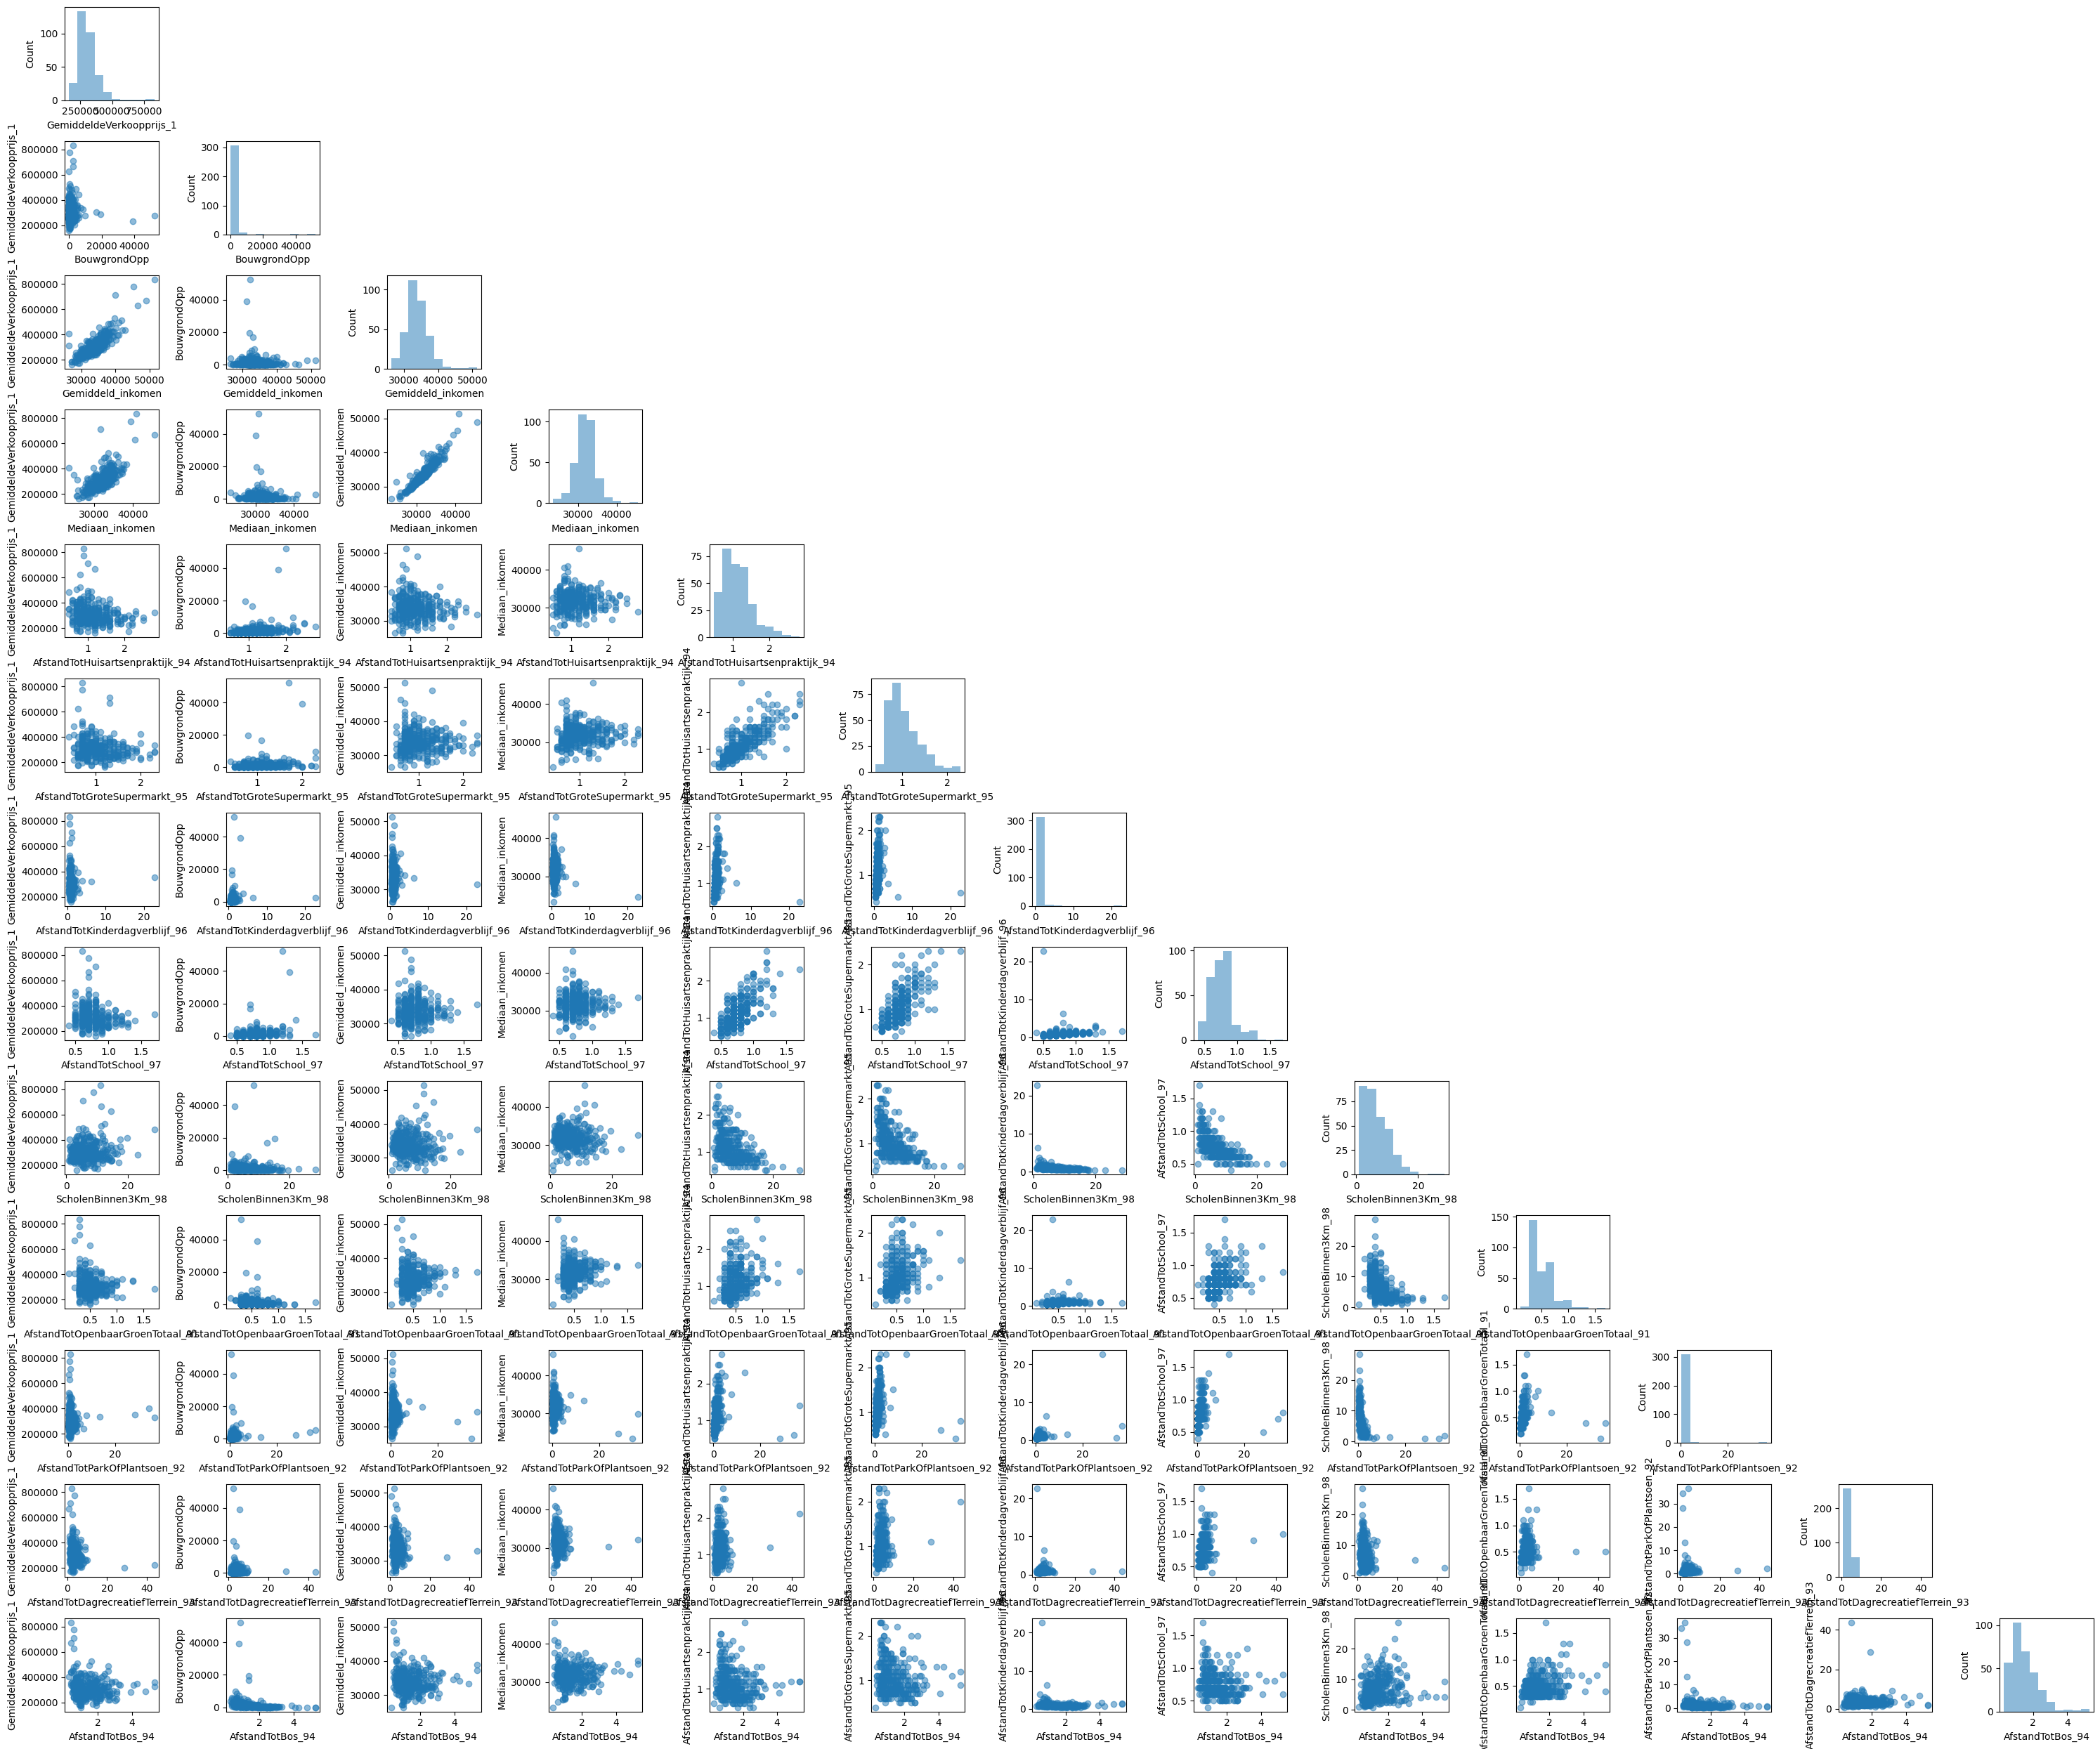

In [39]:
columns = ['GemiddeldeVerkoopprijs_1', 'BouwgrondOpp', 'Gemiddeld_inkomen', 'Mediaan_inkomen',
       'AfstandTotHuisartsenpraktijk_94', 'AfstandTotGroteSupermarkt_95', 'AfstandTotKinderdagverblijf_96',
       'AfstandTotSchool_97', 'ScholenBinnen3Km_98',
       'AfstandTotOpenbaarGroenTotaal_91', 'AfstandTotParkOfPlantsoen_92',
       'AfstandTotDagrecreatiefTerrein_93', 'AfstandTotBos_94'
       ]


scatterplotmatrix(df_data[columns].values, figsize=(30, 25), names=columns, alpha=0.5)
plt.tight_layout()
plt.savefig('plots/scatterplot_df_data.jpg')

Ondanks de grote afbeelding geeft het redelijk goed beeld van verbanden tussen onze verschillende kolommen zoals:
- er is een verband tussen `gemiddelde verkoop prijs` en `gemiddeld inkomen`
- er is een verband tussen `mediaan inkomen` en `gemiddelde verkoop prijs` 
- er is een verband tussen `mediaan inkomen` en `gemiddeld inkomen`
- er is een verband tussen `afstand tot een huisarts` en `afstand tot een supermarkt`
- er is een verband tussen `afstand tot een huisarts` en `afstand tot een school`

Daarnaast het intressant om in te zien dat het lijkt op dat bouwvlakte geen verband heeft met andere variabelen. Echter om dit te valideren moeten we dieper kijken in verbanden doormiddel van correlatie matrix.

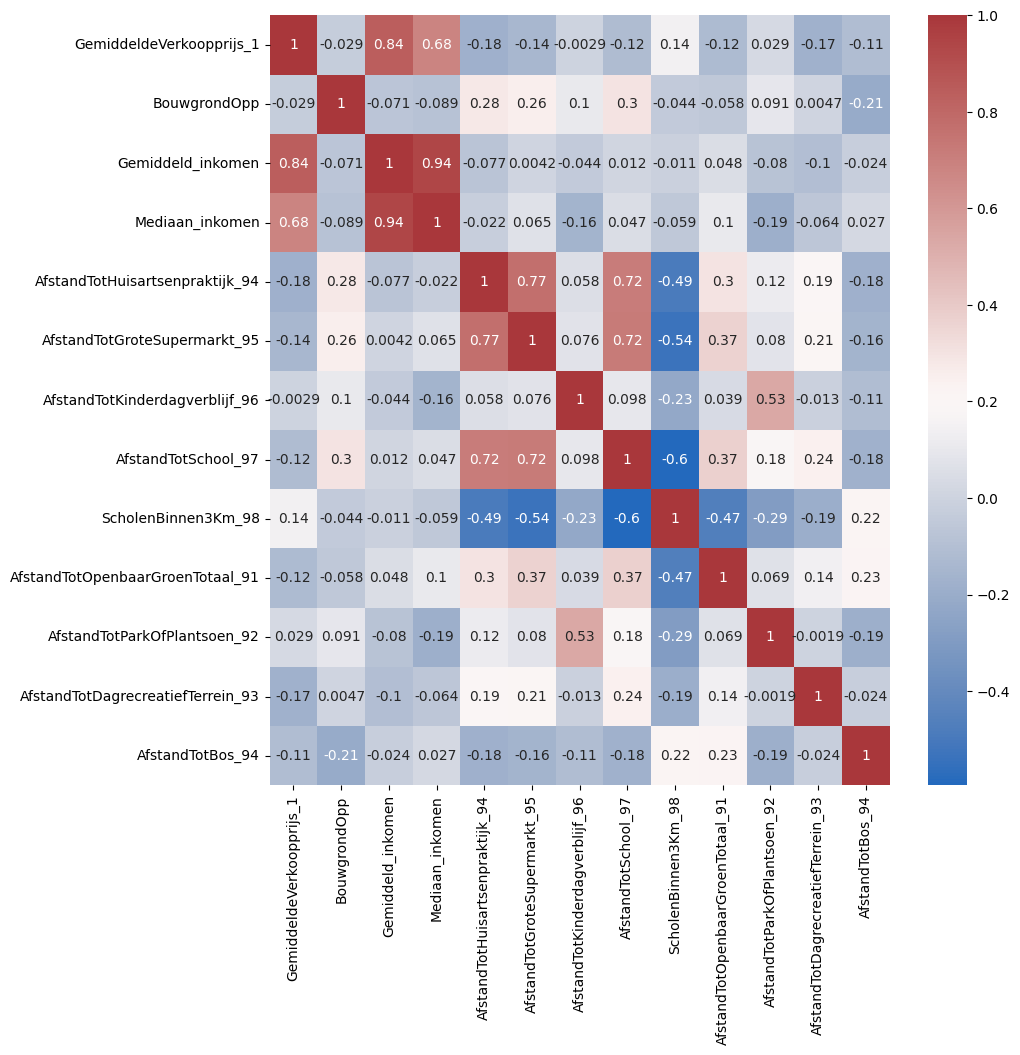

In [40]:
columns = ['GemiddeldeVerkoopprijs_1', 'BouwgrondOpp', 'Gemiddeld_inkomen', 'Mediaan_inkomen',
       'AfstandTotHuisartsenpraktijk_94', 'AfstandTotGroteSupermarkt_95', 'AfstandTotKinderdagverblijf_96',
       'AfstandTotSchool_97', 'ScholenBinnen3Km_98',
       'AfstandTotOpenbaarGroenTotaal_91', 'AfstandTotParkOfPlantsoen_92',
       'AfstandTotDagrecreatiefTerrein_93', 'AfstandTotBos_94'
       ]
corr = df_data[columns].corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr, cmap='vlag', annot=True)
plt.savefig('plots/corr_matrix_df_data.jpg')

Op basis van correlatie matrix kunnen de volgende verbanden geobserveerd worden:
- `Gemiddelde verkoopprijs` heeft een sterke positieve correlatie met `gemiddeld inkomen` en `mediaan inkomen` wat betekend dat gemeentes met gemiddelde hoge inkomens meer betalen voor een huis
- `Gemiddelde verkoopprijs` heeft een zwakke negatieve correlatie met de afstanden tot een huisarts, supermarkt, scholen, openbaar groen, dag recreatie en bos, wat betekent dat hoger inkomens over het algemeen beter toegang hebben tot verschillende facaliteiten
- `Bouwgrond oppervlakte` heeft een zwakke positieve correlatie met afstand tot een huisarts en supermarkt, dit betekent dat wanneer de bouwgrond oppervlakte in een gemeente hoog is de afstand tot deze faciliteiten ook hoog is. 
- `Afstand tot huisarts praktijk` heeft een sterke positieve correlatie met `afstand tot supermarkt`, `afstand tot school` wat betekent dat wanneer de afstand tot de huisarts groter wordt de afstand voor deze ook groter worden. 
- `Afstand tot grote supermarkt` heeft een sterk positieve correlatie met `afstand tot school` en `afstand tot huisarts parktijk` en medium positieve correlatie met `Afstand tot openbaar groen`
- `Afstand tot huisarts praktijk`, `afstand tot school`, `Afstand tot huisartsenpraktijk`, `afstand tot openbaar groen`, en `afstand tot plantsoen` heeft een gemiddelde negative correlatie met `scholen binnen 3km` wat betekent dat wanneer de afstand tot deze facilteiten groter worden er minder scholen binnen 3km aanwezig zijn. 
- `afstand tot openbaar groen` heeft een zwakke positieve correlatie met de `afstand naar een huisarts` en `afstand tot een supermarkt` wat betekent dat wanneer de afstand tot openbaar groen groter wordt de afstanden naar een huisarts en supermarkt groter worden. 
- `afstand tot openbaar groen` heeft een zwakke negatieve correlatie met de `scholen binnen 3 km` wat betekent dat wanneer de afstand tot openbaar groen groter wordt de scholen binnen 3 km afnemen. 
- `afstand tot een park` heeft een gemiddelde positieve correlatie `afstand tot een kinderdag verblijf`en een zwakke positieve correlatie met een `afstand tot een bos`. 
- `afstand tot een dagrecreatie terrein` heeft een zwakke positieve correlatie met afstand tot huisartsen partijk, kinderdag verblijf, scholen en openbaar groen 
-  `afstand tot een bos` heeft een zwakke positive correlatie met `de hoeveelheid scholen binnen 3km` en `openbaar groen`, maar een zwakke negatieve correlatie met `bouwgrond oppervlakte`, `afstand tot de huisarts`, `afstand tot supermarkt`, `afstand tot kinderdag verblijf`, `scholen` en `parken`. 

Kijkend naar de scatterplot en correlatie matrix kunnen we uit de verschillende verbanden opmaken dat over het algemeen de data laat zien dat hoger gemiddelde inkomens meer betalen voor een huis en dichterbij faciliteiten wonen. Faciliteiten zoals scholen, huisarts en supermarkten zijn ook met elkaar verbonden, wat betekent dat deze faciltieten vaak dicht bij elkaar liggen. Dit is ook goed te zien in dat de hoeveelheid scholen binnen 3km afneemt wanneer de afstand naar deze facaliteiten afneemt. Daarnaast is op te merken dat veel bouwoppervlakte niet in de buurt ligt van faciliteiten, maar wel dichter in de buurt ligt van groen. Wat zou betekenen dat er wellicht een trade-off gemaakt moeten worden voor het bouwen van huizen in gebieden met veel groen of veel toegang to faciliteiten. 

Echter is het van belang voor advies deel 1 aan Bob construction B.V. om nu met een concreet resultaat, wat makkelijker te interpreteren is dan een grote scatter of correlatie matrix, daarom is de volgende stap om met deze verbanden in het hoofd visuals the bouwen. Hiervoor zullen gebruiken we `geopandas` en een nieuwe dataset. 

### resultaat advies deel 1 + visuals
Om te starten is het altijd goed om een kijkje te nemen in de data zelf en dit te linken aan de eisen wat Bob Construction B.V stelt aan het advies report. Het eerste advies bestaat uit de het kiezen van gemeentes die:
1. het meeste bouwgrond hebben
2. de kortste afstand naar facilteiten hebben
3. de kortste afstand naar groen hebben 

Op basis van deze eisen kunnen we een top 5 gemeentes maken door de data de sorteren op deze eisen. 

In [41]:
df_geo = gpd.read_file('data/shapes/gemeente_2020_v3.shp')
df_geo

,GM_CODE,GM_NAAM,H2O,OAD,STED,BEV_DICHTH,AANT_INW,AANT_MAN,AANT_VROUW,P_00_14_JR,...,AV20PODIUM,AF_MUSEUM,AV5_MUSEUM,AV10MUSEUM,AV20MUSEUM,JRSTATCODE,JAAR,Shape_Leng,Shape_Area,geometry
0,GM0010,Delfzijl,JA,-99999999,-99999999,-99999999,-99999999,-99999999,-99999999,-99999999,...,-99999999.0,-99999999.0,-99999999.0,-99999999.0,-99999999.0,2020GM0010,2020,128728.007061,9.129235e+07,"MULTIPOLYGON (((268674.309 592382.331, 268667...."
1,GM0034,Almere,JA,-99999999,-99999999,-99999999,-99999999,-99999999,-99999999,-99999999,...,-99999999.0,-99999999.0,-99999999.0,-99999999.0,-99999999.0,2020GM0034,2020,122665.358634,1.095623e+08,"MULTIPOLYGON (((150213.998 479503.726, 150087...."
2,GM0050,Zeewolde,JA,-99999999,-99999999,-99999999,-99999999,-99999999,-99999999,-99999999,...,-99999999.0,-99999999.0,-99999999.0,-99999999.0,-99999999.0,2020GM0050,2020,83290.773617,1.633050e+07,"MULTIPOLYGON (((154927.535 474979.290, 154931...."
3,GM0060,Ameland,JA,-99999999,-99999999,-99999999,-99999999,-99999999,-99999999,-99999999,...,-99999999.0,-99999999.0,-99999999.0,-99999999.0,-99999999.0,2020GM0060,2020,156406.894023,2.085914e+08,"POLYGON ((196000.000 610000.000, 196000.000 60..."
4,GM0072,Harlingen,JA,-99999999,-99999999,-99999999,-99999999,-99999999,-99999999,-99999999,...,-99999999.0,-99999999.0,-99999999.0,-99999999.0,-99999999.0,2020GM0072,2020,104274.683036,3.618323e+08,"MULTIPOLYGON (((158392.775 580357.500, 158387...."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
433,GM1963,Hoeksche Waard,NEE,825,4,325,87401,43211,44190,16,...,9.8,7.9,0.2,1.0,10.4,2020GM1963,2020,147020.366016,2.818623e+08,"MULTIPOLYGON (((98666.226 412682.437, 98543.00..."
434,GM1966,Het Hogeland,NEE,410,5,99,47801,24042,23759,15,...,3.3,5.9,0.4,1.7,7.0,2020GM1966,2020,323086.469173,4.878506e+08,"MULTIPOLYGON (((215169.098 595155.688, 215169...."
435,GM1969,Westerkwartier,NEE,475,5,175,63329,31810,31519,17,...,5.6,5.2,0.8,2.4,12.9,2020GM1969,2020,99030.762281,3.688457e+08,"POLYGON ((211363.510 585818.360, 211364.156 58..."
436,GM1970,Noardeast-FryslÃ¢n,NEE,463,5,120,45228,22768,22460,17,...,1.2,4.6,0.7,1.9,7.5,2020GM1970,2020,238426.959616,3.837930e+08,"MULTIPOLYGON (((207521.119 595796.903, 207521...."


De volgende data importeert een shape file. Een shape file is een veelgebruikt uitwisselingsformaat voor geografische informatie en bestaat uit data waarmee de geografische ligging van object kan worden getoond (bijvoorbeeld een gemeente in Nederland). We hebben de shapefile ook uit het CBS gehaald ([bron](https://opendata.cbs.nl/#/CBS/nl/)) en het doel is nu om deze shape file te mergen met onze huidige data om zo een interactieve kaart te ontwikkelen over Nederland voor Bob Construction B.V. Natuurlijk moeten we voordat we deze data gaan mergen wel weer even checken of de data in orde is.   

In [42]:
df_geo[['GM_NAAM', 'geometry']].isnull().sum()

GM_NAAM     0
geometry    0
dtype: int64

Dat lijkt allemaal goed te gaan, maar het lijkt erop dat de shapes tussen de twee dataframes verschillende is. 

In [43]:
print(df_data.shape)
print(df_geo.shape)

(318, 14)
(438, 205)


Dit klopt, het is gek om te zien dat geografische dataset `df_geo` meer rows heeft en dus ook meer gemeentes, het kan wellicht zijn dat dit een wat oude dataset is en vanwege het aantal gemeentes de komende jaren is blijven afnemen dat deze niet helemaal up te date is, maar geen probleem we kunnen nogsteeds met deze set werken want we hebben alleen de geografische informatie nodig van bepaalde gebieden. 

In [44]:
df_data_to_explore = pd.merge(df_data, df_geo[['GM_NAAM', 'geometry']], left_on='Gemeentenaam_1', right_on='GM_NAAM', how='outer')
df_data_to_explore.loc[df_data_to_explore['Gemeentenaam_1'].isnull(), 'Gemeentenaam_1'] = df_data_to_explore.loc[df_data_to_explore['Gemeentenaam_1'].isnull(), 'GM_NAAM']
df_data_to_explore = df_data_to_explore.drop('GM_NAAM', axis=1)
df_data_to_explore = df_data_to_explore.dropna(subset=['geometry'])
df_data_to_explore.isnull().sum()

Gemeentenaam_1                        0
AfstandTotHuisartsenpraktijk_94      48
AfstandTotGroteSupermarkt_95         48
AfstandTotKinderdagverblijf_96       48
AfstandTotSchool_97                  48
ScholenBinnen3Km_98                  48
BouwgrondOpp                         48
GemiddeldeVerkoopprijs_1             48
AfstandTotOpenbaarGroenTotaal_91     48
AfstandTotParkOfPlantsoen_92         48
AfstandTotDagrecreatiefTerrein_93    48
AfstandTotBos_94                     48
Gemiddeld_inkomen                    48
Mediaan_inkomen                      48
geometry                              0
dtype: int64

In [45]:
m = gpd.GeoDataFrame(df_data_to_explore, geometry=df_data_to_explore['geometry']).explore('BouwgrondOpp')
m.save('maps/bouwgrondoppervlakte.html')

Zo te zien, werkt het. De kaart laat een mooi overzicht zien van de bouwoppervlakte van Nederland. Het zijn veel datapunten maar het bestand is opgeslagen in /maps en kan uitgevoerd worden in elke browser, wat handig is voor Bob Construction B.V. Vanuit het kaartje is het volgende op te maken over de bouwoppervlakte per gemeente:
- gemeentes Borger, Zeewolde, Apeldoorn en Ede hebben de meeste bouwgrond beschikbaar 
- Over het algmeen is te zien dat het Oosten van Nederland meer bouwgrond beschikbaar heeft dan West-Nederland. 
- De randstad heeft relatief weinig bouwgrond


Het goede aan deze oplossing is dat er verschillende kolommen nu geanalyseerd kunnen worden zoals de gemiddelde verkoopprijs voor een huis per gemeente. De popup geven een goed overzicht van bijna elke gemeente en hun gegevens.   

In [46]:
m = gpd.GeoDataFrame(df_data_to_explore, geometry=df_data_to_explore['geometry']).explore('GemiddeldeVerkoopprijs_1', cmap='Reds')
m.save('maps/gemiddeldeverkoopprijs.html')

Voor de gemiddelde verkoopprijs zien we direct het verband met correlatie matrix. De gemiddelde verkoop prijs ligt hoger in de randstad dan het oosten van nederland. Dit betekent ook dat hoogstwaarschijnlijk hoge inkomens voornamelijk in de randstad leven. Ook betekent dit dat de randstad relatief meer toegang heeft tot scholen, artsen, en supermarkten, maar minder toegang tot openbaar groen. Op basis van het eerder markt onderzoek is uitgekomen dat starters die opzoek zijn naar een woning toegang to faciliteiten en groen belangrijk vinden. Op basis van deze analyse lijkt het erop dat er een trade-off gemaakt moeten worden tussen faciliteiten en openbaar groen. Echter zal de volgende stap Het kiezen van de gemeentes dit moeten uitwijzen.  

## 4. Het kiezen van gemeentes
Met nu een idee en inzicht van de data is het nu zaak om uit de analyse de beste gemeentes te vinden. Echter hebben we veel variabelen waar rekening mee gehouden moet worden. Daarom is de volgende stap om een optimalizatie programma te schrijven wat op basis van bouwgrond, facilteiten en groen voorziening beslist waar het beste is voor Bob Construction B.V. om te starten met bouwen. 

We zullen een linear programming optimizatie moeten uitvoeren dat de gemeentes kiest waarin de bouwgrond kan worden gemaximaliseert en de afstand naar voorziening wordt geminimaliseert, laten we er vanuit gaan dat Bob construction op 5 plekken wilt gaan bouwen. Hiervoor kunnen we het volgende model bedenken. 

*Beslissingsvariabelen* : geeft antwoord op wat we willen weten (cq. in welke gemeente gaan we bouwen)
- `x` : variablen {0,1} voor elke gemeente 1 betekent gekozen 0 niet gekozen

*Parameters* : variabelen die we weten uit de data
- `B` : bouwgrond per gemeente
- `H` : afstand huisarts per gemeente
- `M` : afstand supermarkt per gemeente
- `K` : afstand kinderdag verblijf per gemeente
- `S` : afstand tot school
- `SB` : scholen binnen 3 km per gemeente
- `OG` : afstand tot openbaar groen
- `P` : afstand tot park
- `R` : afstand tot recreatie terrein
- `F` : afstand tot bos

*Doel* : het kiezen van gemeentes
- `maximize som x * B + som x * SB` : maximaliseer de bouwgrond en hoeveelheid scholen binnen 3 km
- `minimize som x * H + x * M + x * K + x * S + x * OG + x * P + x * R +  x * F` : minimaliseer afstand tussen faciliteiten en groen voorzieningen

*Beperkingen*:
- `som x >= 1` : minimaal 1 gemeente moet gekozen worden
- `som x <= 5` : max 5 gemeentes mogen gekozen worden

Nu kunnen we model in python programmeren door de optimializatie package Pulp te gebruiken. 

In [47]:
from pulp import *
import math

In [48]:
gemeentes = df_data['Gemeentenaam_1'].tolist()
nr_of_gemeentes = len(gemeentes)
# Define the parameters 
B = df_data['BouwgrondOpp'].tolist()
H = df_data['AfstandTotHuisartsenpraktijk_94'].tolist()
M = df_data['AfstandTotGroteSupermarkt_95'].tolist()
K = df_data['AfstandTotKinderdagverblijf_96'].tolist()
S = df_data['AfstandTotSchool_97'].tolist()
SB = df_data['ScholenBinnen3Km_98'].tolist()
OG = df_data['AfstandTotOpenbaarGroenTotaal_91'].tolist()
P = df_data['AfstandTotParkOfPlantsoen_92'].tolist()
R = df_data['AfstandTotDagrecreatiefTerrein_93'].tolist()
F = df_data['AfstandTotBos_94'].tolist()

# define binary decision variables foreach gemeente
x = [LpVariable(f'x{i}', 0, 1, cat='binary') for i in range(nr_of_gemeentes)]

w1 = 0.8

# Define the multi-objective optimization problem
model = LpProblem('multi-objective', LpMaximize)

# Define the objective function
model += sum([B[i]*x[i] + SB[i]*x[i] for i in range(nr_of_gemeentes)]) - sum([H[i]*x[i] + M[i]*x[i] + K[i]*x[i] + S[i]*x[i] + OG[i]*x[i] + P[i]*x[i] + R[i]*x[i] + F[i]*x[i] for i in range(nr_of_gemeentes)])

# set constraints
model += sum(x) >= 1
model += sum(x) <= 5

model.solve()
print('Gekozen gemeentes')
for i in range(nr_of_gemeentes):
    if x[i].value() == 1:
        print('-', gemeentes[i], 'met bouwgrond oppervlak van', B[i], 'm2.')
        print('\tVoor gemeente', gemeentes[i], 'de afstanden tot een huisarts, supermarkt, kinderdagverblijf zijn:', H[i], ',', M[i], ',', K[i], 'km.')
        print('\tVoor gemeente', gemeentes[i], 'de afstanden tot openbaar groen, een park, recreatie, bos zijn:', OG[i], ',', P[i], ',', R[i], ',', F[i], 'km.')
        print('\t', gemeentes[i], 'heeft gemiddeld', SB[i], 'scholen binnen 3 kilometer.')

Gekozen gemeentes
- Apeldoorn met bouwgrond oppervlak van 19467 m2.
	Voor gemeente Apeldoorn de afstanden tot een huisarts, supermarkt, kinderdagverblijf zijn: 0.9 , 0.8 , 0.8 km.
	Voor gemeente Apeldoorn de afstanden tot openbaar groen, een park, recreatie, bos zijn: 0.4 , 1.0 , 2.3 , 1.4 km.
	 Apeldoorn heeft gemiddeld 15.2 scholen binnen 3 kilometer.
- Borger-Odoorn met bouwgrond oppervlak van 39140 m2.
	Voor gemeente Borger-Odoorn de afstanden tot een huisarts, supermarkt, kinderdagverblijf zijn: 1.8 , 2.0 , 3.1 km.
	Voor gemeente Borger-Odoorn de afstanden tot openbaar groen, een park, recreatie, bos zijn: 0.6 , 1.7 , 5.4 , 0.8 km.
	 Borger-Odoorn heeft gemiddeld 2.3 scholen binnen 3 kilometer.
- Ede met bouwgrond oppervlak van 16761 m2.
	Voor gemeente Ede de afstanden tot een huisarts, supermarkt, kinderdagverblijf zijn: 1.1 , 1.1 , 0.8 km.
	Voor gemeente Ede de afstanden tot openbaar groen, een park, recreatie, bos zijn: 0.6 , 1.7 , 3.9 , 1.4 km.
	 Ede heeft gemiddeld 12.8 schol

Met de optimalizatie in orde en de gekozen vijf gemeentes Apeldoorn, Borger-Doorn, Ede, Westerveld en Zeewolde kunnen we het eerste deel van het advies opmaken.  

## 5. Advies deel 1
Het optimizatie programma heeft hierop vijf gemeentes gekozen die aan de eisen van de starters uit het marktonderzoek en Bob Construction B.V. voldoet. Echter zien we wel de verbanden terug uit de analyse waarin openbaar groen voorzieningen afnemen wanneer de facilieiten zoals huisartsen en scholen in afstand toenemen. Echter geven alle vijf gemeentes een mooi start punt om te bouwen for Bob construction B.V. 

## 6. Winst en hoeveelheid huizen optimizeren voor de gekozen gemeente
Met de gekozen gemeentes uit de dataset gehaald kunnen we nu berekenen hoeveel huizen er op bouwgrond gebouwd kan worden. Volgens de aangeleverde informatie heeft een starterwoning 120m2 aan bouw grond nodig met de kosten van 1200-1800 euro per m2. Daarnaast heeft Bob construction een budget van 15 miljoen voor het bouwen van huizen en moeten de huizen betaalbaar zijn voor starters. Op basis van deze nieuwe informatie kunnen we ons optimilizatie model aanpassen.

*Beslissingsvariabelen* : geeft antwoord op wat we willen weten
- `y` : hoeveel starters woningen moet er gebouwd worden per gekozen gemeente?

*Parameters* : variabelen die we weten uit de data
- `B` : bouwgrond per gemeente
- `I` : gemiddeld inkomen per gemeente
- `V` : gemiddelde verkoop prijs
- `C = 1500` : gemiddelde bouwkosten per m2 bouwgrond 
- `BUDGET = 15_000_000` : 15 miljoen bouw budget

*Doel* : het berekenen van de winst
- `maximize y + som y*V` : maximaliseer the hoeveelheid huizen en de winst


*Beperkingen*:
- `y > 0` : je kunt niet een negatieve hoeveelheid huizen bouwen per gemeente
- `som y <= (B/120)` : de hoeveelheid starters woningen moet kleiner of gelijk zijn aan de beschikbare bouwgrond per gekozen gemeente. 
- `som y*(120*C) <= BUDGET` : De kosten moeten kleiner of gelijk zijn aan het beschikbare budget
- `som y*V <= y*(2*(I * 4.5))` : De verkoopprijs van een starters woning moet lager of gelijk zijn aan de hypotheek die iemand zich kan veroorloven in de gemeente keer 2 personen. Want we gaan er vanuit dat starters in tweetallen zijn en dat zij voor 4.5 keer hun gezamelijk inkomen een hypotheek kunnen afsluiten.  

Nu moeten we eerst de gekozen gemeentes uit onze master dataset halen. 

In [49]:
chose_gemeentes = []
for i in range(nr_of_gemeentes):
    if x[i].value() == 1:
        chose_gemeentes.append(gemeentes[i])
df_chose_gemeentes = df_data[df_data['Gemeentenaam_1'].isin(chose_gemeentes)]

In [50]:
df_chose_gemeentes

,Gemeentenaam_1,AfstandTotHuisartsenpraktijk_94,AfstandTotGroteSupermarkt_95,AfstandTotKinderdagverblijf_96,AfstandTotSchool_97,ScholenBinnen3Km_98,BouwgrondOpp,GemiddeldeVerkoopprijs_1,AfstandTotOpenbaarGroenTotaal_91,AfstandTotParkOfPlantsoen_92,AfstandTotDagrecreatiefTerrein_93,AfstandTotBos_94,Gemiddeld_inkomen,Mediaan_inkomen
15,Apeldoorn,0.9,0.8,0.8,0.7,15.2,19467,287155.0,0.4,1.0,2.3,1.4,32000.0,30300.0
40,Borger-Odoorn,1.8,2.0,3.1,1.3,2.3,39140,233711.0,0.6,1.7,5.4,0.8,31200.0,30000.0
75,Ede,1.1,1.1,0.8,0.7,12.8,16761,302817.0,0.6,1.7,3.9,1.4,33100.0,31400.0
289,Westerveld,2.2,2.3,1.5,1.4,1.4,9736,279468.0,0.6,4.9,2.6,0.6,33400.0,31700.0
307,Zeewolde,2.0,1.7,1.4,1.2,8.5,52210,275729.0,0.3,0.7,2.4,0.9,32300.0,30700.0


In [51]:
chose_gemeentes = df_chose_gemeentes['Gemeentenaam_1'].tolist() 
nr_of_gemeentes = len(chose_gemeentes) 

# Define the parameters 
B = df_chose_gemeentes['BouwgrondOpp'].tolist()
I = df_chose_gemeentes['Gemiddeld_inkomen'].tolist() 
V = df_chose_gemeentes['GemiddeldeVerkoopprijs_1'].tolist() 
C = 1800
BUDGET = 15_000_000

# define decision variables foreach gemeente. 
y = [LpVariable(f'y{i}', 0, math.floor(B[i]/120), cat='Integer') for i in range(nr_of_gemeentes)]

model = LpProblem('starterwoningen', LpMaximize)

# Define the objective function
model += sum(y) + sum([y[i]*V[i] for i in range(nr_of_gemeentes)])

# set constraints
model += sum([y[i]*(120*C) for i in range(nr_of_gemeentes)]) <= BUDGET

for i in range(nr_of_gemeentes):
     model += y[i]*V[i] <= y[i]*(2*(I[i]*4.5))

model.solve()

print('Winst per gemeente voor Bob construction B.V.')
total_profit = []
total_houses = []
for i in range(nr_of_gemeentes):
    print('- Bouw binnen', chose_gemeentes[i], 'levert maximaal', y[i].value(), 'starters woningen op.')
    print('\tGemiddelde hypotheek in', chose_gemeentes[i], 'is', 2*(I[i]*4.5))
    print('\tGemiddelde huisprijs in', chose_gemeentes[i], 'is', V[i])
    print('\tOp basis van', y[i].value(), 'starterswoningen in', chose_gemeentes[i], 'kan er', (y[i].value()*V[i])-(y[i].value()*(120*C)), 'winst gemaakt worden\n')
    total_profit.append((y[i].value()*V[i])-(y[i].value()*(120*C)))
    total_houses.append(y[i].value())
    
print('\nDe totale winst voor Bob construction B.V. is', sum(total_profit), 'op', sum(total_houses), 'starters woningen. Een winst marge van', round(sum(total_profit)/sum(total_houses), 2),'per woning.')


Winst per gemeente voor Bob construction B.V.
- Bouw binnen Apeldoorn levert maximaal 69.0 starters woningen op.
	Gemiddelde hypotheek in Apeldoorn is 288000.0
	Gemiddelde huisprijs in Apeldoorn is 287155.0
	Op basis van 69.0 starterswoningen in Apeldoorn kan er 4909695.0 winst gemaakt worden

- Bouw binnen Borger-Odoorn levert maximaal 0.0 starters woningen op.
	Gemiddelde hypotheek in Borger-Odoorn is 280800.0
	Gemiddelde huisprijs in Borger-Odoorn is 233711.0
	Op basis van 0.0 starterswoningen in Borger-Odoorn kan er 0.0 winst gemaakt worden

- Bouw binnen Ede levert maximaal 0.0 starters woningen op.
	Gemiddelde hypotheek in Ede is 297900.0
	Gemiddelde huisprijs in Ede is 302817.0
	Op basis van 0.0 starterswoningen in Ede kan er 0.0 winst gemaakt worden

- Bouw binnen Westerveld levert maximaal 0.0 starters woningen op.
	Gemiddelde hypotheek in Westerveld is 300600.0
	Gemiddelde huisprijs in Westerveld is 279468.0
	Op basis van 0.0 starterswoningen in Westerveld kan er 0.0 winst ge

Om de winst en de hoeveelheid starterwoning te maximaliseren is de optimale oplossing om 69 woningen in Apeldoorn te bouwen. Deze 69 starterwoningen zal Bob Construction B.V. ongeveer 138 starters aan het woning kunnen helpen. Aan de financiele kant zal Bob Construction B.V. een mogelijke totale winst kunnen boeken van 4.909,695,-, wat ongeveer op een winst marge van 71.155,- per woning zal uitkomen. 

Doordat binnen deze optimalisatie rekening is gehouden met mogelijke hypotheek die 2 starters op dit moment (2023) kunnen krijgen zullen deze starterswoningen ook betaalbaar zijn voor starters. Echter moet in dit resultaat wel aangestipt worden dat er in dit model uitgegaan wordt van een maximale haalbare hypotheek voor twee starters op basis van het gemiddelde inkomen per gemeente, mogelijke schulden (zoals een studieschuld) zijn niet meegenomen. Een starter in Nederland heeft gemiddeld een studie schuld van 20.000,-, wanneer we dit in het model zouden zetten zou er wellicht een ander advies uitrollen. Voor de laatste keer kunnen we het model aanpassen door nog een parameter `SCHULD = 20000` toe te voegen aan het model. Dit zal de volgende beperking opleveren in het model:    

- `som y*V <= y*(2*(I * 4.5))` -----> `som y*V <= y*(2*(I * 4.5) - 2*SCHULD)`

In [52]:
chose_gemeentes = df_chose_gemeentes['Gemeentenaam_1'].tolist() 
nr_of_gemeentes = len(chose_gemeentes) 

# Define the parameters 
B = df_chose_gemeentes['BouwgrondOpp'].tolist()
I = df_chose_gemeentes['Gemiddeld_inkomen'].tolist() 
V = df_chose_gemeentes['GemiddeldeVerkoopprijs_1'].tolist() 
C = 1800
BUDGET = 15_000_000
SCHULD = 20_000

# define decision variables foreach gemeente. 
y = [LpVariable(f'y{i}', 0, math.floor(B[i]/120), cat='Integer') for i in range(nr_of_gemeentes)]

model = LpProblem('starterwoningen', LpMaximize)

# Define the objective function
model += sum(y) + sum([y[i]*V[i] for i in range(nr_of_gemeentes)])

# set constraints
model += sum([y[i]*(120*C) for i in range(nr_of_gemeentes)]) <= BUDGET

for i in range(nr_of_gemeentes):
     model += y[i]*V[i] <= y[i]*(2*(I[i]*4.5) - 2*SCHULD) 

model.solve()

print('Winst per gemeente voor Bob construction B.V.')
total_profit = []
total_houses = []
for i in range(nr_of_gemeentes):
    print('- Bouw binnen', chose_gemeentes[i], 'levert maximaal', y[i].value(), 'starters woningen op.')
    print('\tGemiddelde hypotheek in', chose_gemeentes[i], 'is', 2*(I[i]*4.5))
    print('\tGemiddelde huisprijs in', chose_gemeentes[i], 'is', V[i])
    print('\tOp basis van', y[i].value(), 'starterswoningen in', chose_gemeentes[i], 'kan er', (y[i].value()*V[i])-(y[i].value()*(120*C)), 'winst gemaakt worden\n')
    total_profit.append((y[i].value()*V[i])-(y[i].value()*(120*C)))
    total_houses.append(y[i].value())
    
print('\nDe totale winst voor Bob construction B.V. is', sum(total_profit), 'op', sum(total_houses), 'starters woningen. Een winst marge van', round(sum(total_profit)/sum(total_houses), 2),'per woning.')

Winst per gemeente voor Bob construction B.V.
- Bouw binnen Apeldoorn levert maximaal 0.0 starters woningen op.
	Gemiddelde hypotheek in Apeldoorn is 288000.0
	Gemiddelde huisprijs in Apeldoorn is 287155.0
	Op basis van 0.0 starterswoningen in Apeldoorn kan er 0.0 winst gemaakt worden

- Bouw binnen Borger-Odoorn levert maximaal 69.0 starters woningen op.
	Gemiddelde hypotheek in Borger-Odoorn is 280800.0
	Gemiddelde huisprijs in Borger-Odoorn is 233711.0
	Op basis van 69.0 starterswoningen in Borger-Odoorn kan er 1222059.0 winst gemaakt worden

- Bouw binnen Ede levert maximaal 0.0 starters woningen op.
	Gemiddelde hypotheek in Ede is 297900.0
	Gemiddelde huisprijs in Ede is 302817.0
	Op basis van 0.0 starterswoningen in Ede kan er 0.0 winst gemaakt worden

- Bouw binnen Westerveld levert maximaal 0.0 starters woningen op.
	Gemiddelde hypotheek in Westerveld is 300600.0
	Gemiddelde huisprijs in Westerveld is 279468.0
	Op basis van 0.0 starterswoningen in Westerveld kan er 0.0 winst ge

Met toegevoegen van een studieschuld zien we dat bouw in gemeente Borger-Odoorn de optimale oplossing is voor het leveren van 69 starterwoningen. Wat opmerkelijk is dat de winst van Bob Construction B.V. vele male lager is vergeleken met bouw in Apeldoorn. 

## 7. Advies deel 2
Voor het tweede deel van het advies was Bob construction B.V. geïnteresseerd in het volgende:
- een inschatting van de potentiële winst
- Hoeveel starters woningen er gebouwd kunnen worden 
- Hoeveel starters er geholpen kunnen worden bij de bouw van zo een woning

Op basis van gekozen gemeentes Apeldoorn, Borger, Ede, Westerveld, en Zeewolde is er bouw/potentiële winst optimalisatie gemaakt, waarin rekening gehouden moest worden met de betaalbaarheid van de woning, mogelijke (studie) schulden van de starters en het bouwbudget. Deze optimimalisaties hebben tot de volgende scenario's geleidt. 

- **Scenario geen studieschuld** : bouw van 69 starters woningen in Apeldoorn waarin 138 starters geholpen kunnen worden. Potentiële winst 71155,- per woning.
- **Scenario met studieschuld** : bouw van 69 starters woningen in Borger-Odoorn waarin 138 starters geholpen kunnen worden, Potentiële winst 17711,- per woning. 

Uit de optimalisatie resultaten kan worden opgemaakt dat Bob Construction B.V. voor de bouw van starterwoning het beste zich kan richten op het Zuid-Oost, Oosten van Nederland. Bij de bouw van starterswoningen binnen Apeldoorn het meesten winst zou opleveren, maar staat wel tegenover dat starters met een mogelijke studieschuld van 20.000,- buiten de boot vallen. 

Bij het optimaliseren met studieschuld zien we dan ook andere resultaten terug, waarin gemeente Borger de beste kandidaat voor de bouw van starters woningen zou zijn, ten koste van de mogelijke potentiële winst. 

